# White Noise vs. Stationary Time Series

(Sourced from: https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

- Like stationary series, white noise is also not a function of time, meaning its mean and variance does not change over time. 
- The difference between a regular stationary series and white noise is that the latter is completely random with a mean of 0. (There is no pattern in white noise)


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# create white noise
random_values = np.random.randn(1000)

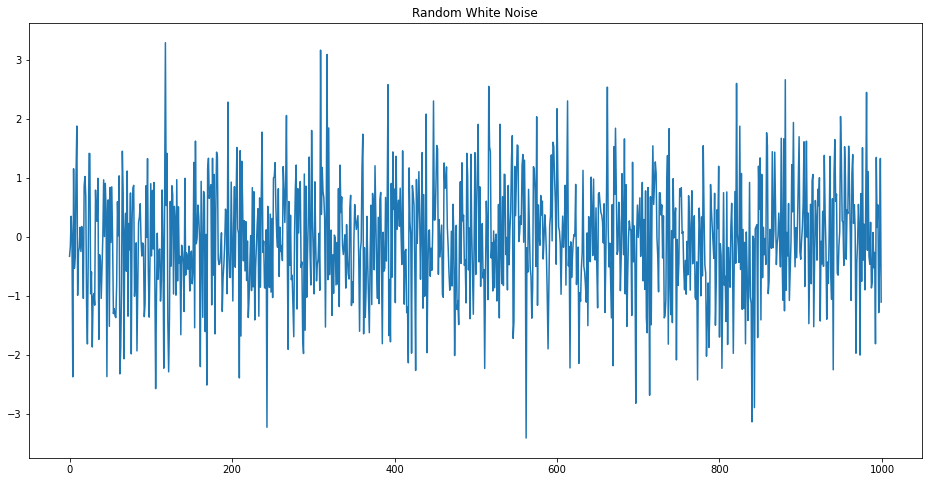

In [3]:
plt.figure(figsize=(16,8))
pd.Series(random_values).plot(title="Random White Noise")
plt.show()

## Augmented Dickey-Fuller (ADF) Test

In [4]:
result = adfuller(random_values, autolag="AIC")
print(result)

(-31.963083725765518, 0.0, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2758.4999543831054)


In [5]:
statistic = result[0]
p_value = result[1]
used_lag = result[2]
nobs = result[3]
critical_values = result[4]
icbest = result[5]

In [6]:
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'n lags: {used_lag}')
print(f'nobs: {nobs}')
print(f'icbest: {icbest}')

for key, value in critical_values.items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


print(f'\nResult: The series is {"not " if p_value > 0.05 else ""}stationary')

ADF Statistic: -31.963083725765518
p-value: 0.0
n lags: 0
nobs: 999
icbest: 2758.4999543831054
Critial Values:
   1%, -3.4369127451400474
Critial Values:
   5%, -2.864437475834273
Critial Values:
   10%, -2.568312754566378

Result: The series is stationary


## KPSS Test around constant

In [7]:
result = kpss(random_values, regression="c")
print(result)

(0.29288492621913037, 0.1, 22, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [8]:
statistic = result[0]
p_value = result[1]
n_lags = result[2]
critical_values = result[3]

In [9]:
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is {"not " if p_value < 0.05 else ""}stationary around a constant')

KPSS Statistic: 0.29288492621913037
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is stationary around a constant
